# BELAJAR PCA STEP BY STEP

Dr. Suryasatriya Trihandaru, M.Sc.nat    
Big Data Analysis    
Magiuster Data Science FSM UKSW

Kuliah minggu lalu: elasticnet, alpha=0.1, l1_ratio=0.5, diperoleh 4 features     
Ridge, alpha=0.1, diperoleh fatures 8. Bagaimana cara menggambar yang paling mewakili seluruh feature yang dipakai?

**PCA = Principle Component Analysis
Ini memakai pengetahuan tentang eigenvalue dan eigenvector**

## Menggambar vektor

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
p0 = np.array([0,0])  # origin (x=0, y=0)
v  = np.array([0.5,0.6])
u  = np.array([0.7, -0.5])

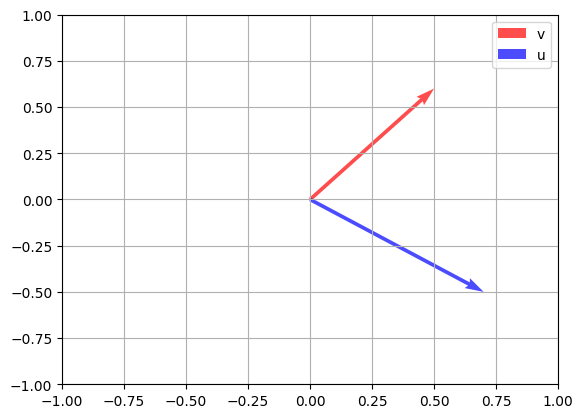

In [9]:
plt.quiver(*p0, *v, angles='xy', scale_units='xy', scale=1, 
           color='red', alpha=0.7, label='v')
plt.quiver(*p0, *u, angles='xy', scale_units='xy', scale=1, 
           color='blue', alpha=0.7, label='u')

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()
plt.legend()
plt.show()

In [10]:
# Apa pengaruh matrikx A terhadap vektor?
A = np.array([[1, 0.5 ], [0.4, 1.5]])
Av = np.dot(A,v)
Au = np.dot(A,u)

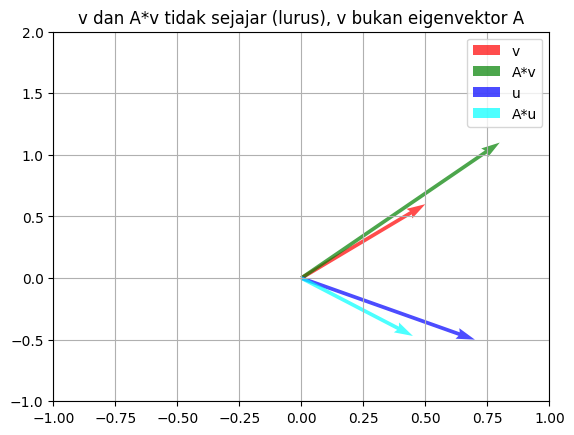

In [11]:
plt.quiver(*p0, *v, angles='xy', scale_units='xy', scale=1, 
           color='red', alpha=0.7, label='v')
plt.quiver(*p0, *Av, angles='xy', scale_units='xy', scale=1, 
           color='green', alpha=0.7, label='A*v')

plt.quiver(*p0, *u, angles='xy', scale_units='xy', scale=1, 
           color='blue', alpha=0.7, label='u')
plt.quiver(*p0, *Au, angles='xy', scale_units='xy', scale=1, 
           color='cyan', alpha=0.7, label='A*u')


plt.xlim(-1,1)
plt.ylim(-1,2)
plt.grid()
plt.legend()
plt.title('v dan A*v tidak sejajar (lurus), v bukan eigenvektor A')
plt.show()

## Eigenvalues and Eigenvectors of a Matrix

In [12]:
A = np.array([[1, 0.5 ], [0.4, 1.5]])
eigval, eigvec = np.linalg.eig(A)
eigval, eigvec

(array([0.73765246, 1.76234754]),
 array([[-0.885509  , -0.54843365],
        [ 0.46462222, -0.83619408]]))

In [13]:
#A = np.array([[1, 0.5 ], 
#               [0.4, 1.5]])
Aev = np.dot(A, eigvec)
Aev

array([[-0.6531979 , -0.96653068],
       [ 0.34272972, -1.47366458]])

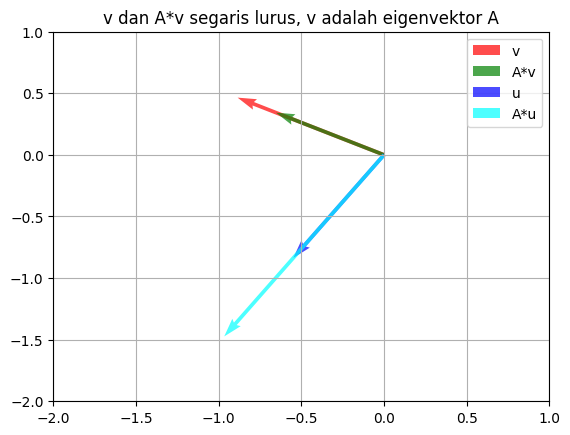

In [14]:
#A = np.array([[1, 0.5 ], [0.4, 1.5]])

plt.quiver(*p0, *eigvec[:,0], angles='xy', scale_units='xy', scale=1, 
           color='red', alpha=0.7, label='v')
plt.quiver(*p0, *Aev[:,0], angles='xy', scale_units='xy', scale=1, 
           color='green', alpha=0.7, label='A*v')

plt.quiver(*p0, *eigvec[:,1], angles='xy', scale_units='xy', scale=1, 
           color='blue', alpha=0.7, label='u')
plt.quiver(*p0, *Aev[:,1], angles='xy', scale_units='xy', scale=1, 
           color='cyan', alpha=0.7, label='A*u')


plt.xlim(-2,1)
plt.ylim(-2,1)
plt.grid()
plt.legend()
plt.title('v dan A*v segaris lurus, v adalah eigenvektor A')
plt.show()

## California Housing Datasets

In [15]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [16]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [20]:
X = data.data
fn = data.feature_names
y = data.target

## Step by step PCA

In [18]:
# Standarisasi data
mean=np.mean(X, axis=0)
std =np.std(X, axis=0)
Xs = (X - mean)/std

Xs

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [40]:
X[0:2,:]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02]])

In [41]:
Xs[0:2,:]

array([[ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
        -0.04959654,  1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, -0.26333577,  0.86143887,
        -0.09251223,  1.04318455, -1.32284391]])

In [23]:
# covariance matrix
COV = np.cov(Xs, rowvar=False)
COV

array([[ 1.00004845, -0.11903976,  0.32691127, -0.06204314,  0.00483458,
         0.01876716, -0.07981299, -0.0151766 ],
       [-0.11903976,  1.00004845, -0.15328485, -0.07775105, -0.29625859,
         0.013192  ,  0.01117321, -0.10820206],
       [ 0.32691127, -0.15328485,  1.00004845,  0.84766239, -0.07221635,
        -0.00485253,  0.10639412, -0.02754139],
       [-0.06204314, -0.07775105,  0.84766239,  1.00004845, -0.06620061,
        -0.0061815 ,  0.06972451,  0.01334504],
       [ 0.00483458, -0.29625859, -0.07221635, -0.06620061,  1.00004845,
         0.06986612, -0.10879002,  0.09977806],
       [ 0.01876716,  0.013192  , -0.00485253, -0.0061815 ,  0.06986612,
         1.00004845,  0.0023663 ,  0.00247594],
       [-0.07981299,  0.01117321,  0.10639412,  0.06972451, -0.10879002,
         0.0023663 ,  1.00004845, -0.92470924],
       [-0.0151766 , -0.10820206, -0.02754139,  0.01334504,  0.09977806,
         0.00247594, -0.92470924,  1.00004845]])

In [25]:
eigval, eigvec = np.linalg.eig(COV)
eigval

array([2.02704763, 1.88139074, 0.04558733, 0.08160574, 0.65941198,
       1.27115235, 1.03108764, 1.0031042 ])

In [21]:
sort_index=np.argsort(eigval)[::-1]
eigval = eigval[sort_index]
eigvec = eigvec[:,sort_index]

In [50]:
eigval

array([2.02704763, 1.88139074, 1.27115235, 1.03108764, 1.0031042 ,
       0.65941198, 0.08160574, 0.04558733])

In [26]:
eigvec

array([[-0.07746229,  0.22987873,  0.24227053,  0.16923764, -0.14981849,
         0.21822239,  0.88529408, -0.00260258],
       [-0.00731846, -0.26078574,  0.04484583, -0.0810348 , -0.68393093,
        -0.6275508 ,  0.10989777,  0.22293588],
       [-0.43914246,  0.54668689, -0.45881371, -0.53066164, -0.09505449,
        -0.06399944,  0.04640173,  0.02985194],
       [-0.3999956 ,  0.50184958,  0.37987469,  0.53156581, -0.08685356,
        -0.19184813, -0.33814378,  0.05092211],
       [ 0.17178267,  0.10062559,  0.01316952, -0.03167607, -0.67522557,
         0.65037482, -0.28320692,  0.00807783],
       [ 0.01464423,  0.00262099, -0.00895931,  0.00324648,  0.16941048,
         0.15772711, -0.00491848,  0.97266948],
       [-0.56836442, -0.37401073,  0.55441475, -0.43179746,  0.04206944,
         0.19259966, -0.062214  , -0.02276072],
       [ 0.53697448,  0.4223868 ,  0.52616501, -0.461698  ,  0.08255109,
        -0.18082441, -0.05984646,  0.01180653]])

In [52]:
# Pilih hanya 2 eigenvalues terbesar
L = eigval[0:2]
V = eigvec[:,0:2]  
V

array([[-0.07746229,  0.22987873],
       [-0.00731846, -0.26078574],
       [-0.43914246,  0.54668689],
       [-0.3999956 ,  0.50184958],
       [ 0.17178267,  0.10062559],
       [ 0.01464423,  0.00262099],
       [-0.56836442, -0.37401073],
       [ 0.53697448,  0.4223868 ]])

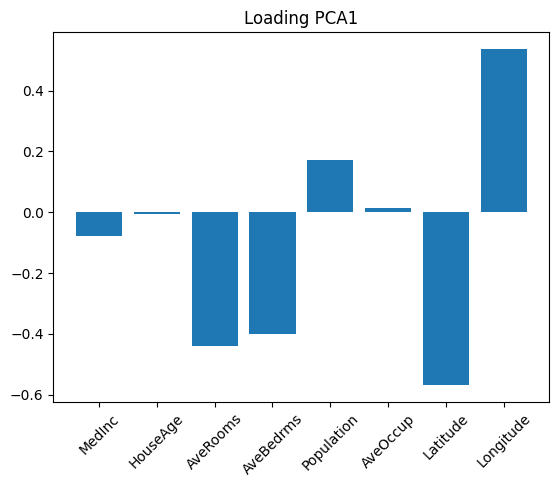

In [55]:
plt.bar(fn, V[:,0])
plt.xticks(rotation=45)
plt.title('Loading PCA1');

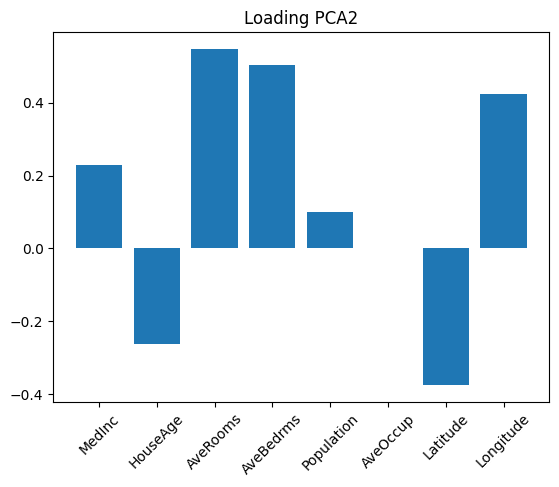

In [66]:
plt.bar(fn, V[:,1])
plt.xticks(rotation=45)
plt.title('Loading PCA2');

In [57]:
Xs.shape, V.shape

((20640, 8), (8, 2))

In [58]:
# Proyeksi data ke sumbu PCA1 dan PCA2
Xp = np.dot(Xs, V)
Xp.shape

(20640, 2)

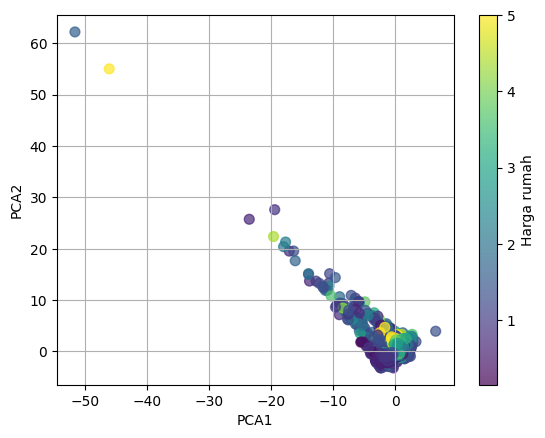

In [65]:
plt.scatter(Xp[:,0], Xp[:,1], s=50, alpha=0.7, c=y, cmap='viridis')
plt.colorbar(label='Harga rumah')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid()
plt.show()

# PCA dengan SKLEARN

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=2)

In [69]:
pca.fit(Xs)

PCA(n_components=2)

In [70]:
Xpca = pca.transform(Xs)

In [72]:
Xpca[0:3,:]

array([[ 1.88270434, -0.50336186],
       [ 1.37111955, -0.12140565],
       [ 2.08686762, -0.5011357 ]])

In [73]:
Xp[0:3,:]

array([[-1.88270434, -0.50336186],
       [-1.37111955, -0.12140565],
       [-2.08686762, -0.5011357 ]])

In [74]:
V

array([[-0.07746229,  0.22987873],
       [-0.00731846, -0.26078574],
       [-0.43914246,  0.54668689],
       [-0.3999956 ,  0.50184958],
       [ 0.17178267,  0.10062559],
       [ 0.01464423,  0.00262099],
       [-0.56836442, -0.37401073],
       [ 0.53697448,  0.4223868 ]])

In [76]:
pca.components_.T

array([[ 0.07746229,  0.22987873],
       [ 0.00731846, -0.26078574],
       [ 0.43914246,  0.54668689],
       [ 0.3999956 ,  0.50184958],
       [-0.17178267,  0.10062559],
       [-0.01464423,  0.00262099],
       [ 0.56836442, -0.37401073],
       [-0.53697448,  0.4223868 ]])

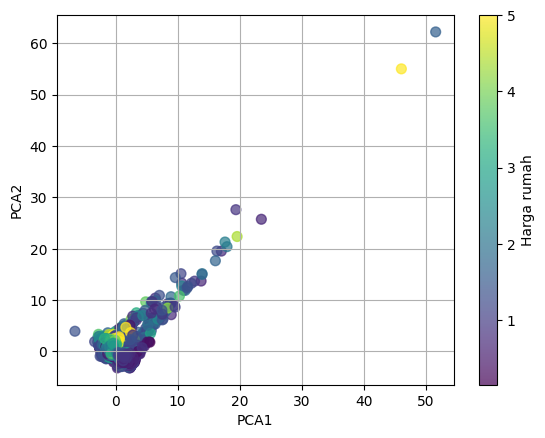

In [77]:
plt.scatter(Xpca[:,0], Xpca[:,1], s=50, alpha=0.7, c=y, cmap='viridis')
plt.colorbar(label='Harga rumah')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid()
plt.show()

# HOMEWORK

Deadline Senin 13 mei 2024, jam 15.00. Kirim ke suryasatriya@uksw.edu

1. Pakailah California Housing Datasets sebagai data
2. Pakailah elastic-net dengan alpha=0.1, dan L1_ratio=0.5, carilah regresi linearnya
3. Carilah features yang dipakai di elastic net 
4. Pakailah PCA (sklearn) uuntuk menggambar data Harga terhadap PCA1 dan PCA2 yang diperoleh dari features2 hasil elastic net